<a href="https://colab.research.google.com/github/tkhs5/hello-world/blob/master/phipsi_biopython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install Biopython


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 24.9 MB/s eta 0:00:00


In [3]:

import Bio.PDB
import pandas as pd


In [21]:
s = Bio.PDB.PDBParser().get_structure('1alc', r'sample_data/3htb.pdb')
#s = Bio.PDB.PDBParser().get_structure('P69441_6f7u.1.B_1_214', r'C:\Users\takahashi\Desktop\1alc.pdb')
s


<Structure id=1alc>

In [22]:

def yieldPhiPsi(model):
    for chain in model:
        polypeptides = Bio.PDB.PPBuilder().build_peptides(chain)
        for poly_index, poly in enumerate(polypeptides):
            phi_psi = poly.get_phi_psi_list()
            for res_index, residue in enumerate(poly):
                phi, psi = phi_psi[res_index]
                yield dict(chain_id=chain.id,
                           poly_index=poly_index,
                           residue_name=residue.resname,
                           author_residue_number=residue.id[1],
                           phi_radian=phi, psi_radian=psi)


df = pd.DataFrame(yieldPhiPsi(s[0]))
df

,chain_id,poly_index,residue_name,author_residue_number,phi_radian,psi_radian
0,A,0,MET,1,NaN,2.615766
1,A,0,ASN,2,-2.676175,3.038684
2,A,0,ILE,3,-1.062017,-0.583649
3,A,0,PHE,4,-1.186475,-0.784912
4,A,0,GLU,5,-1.152774,-0.657551
...,...,...,...,...,...,...
158,A,0,ASP,159,-0.992720,-0.610455
159,A,0,ALA,160,-1.357769,-0.111803
160,A,0,TYR,161,-2.096168,-0.112038
161,A,0,LYS,162,-1.238754,-0.466085


In [24]:

import math
def degrees(rad_angle) :
    """Converts any angle in radians to degrees.

    If the input is None, then it returns None.
    For numerical input, the output is mapped to [-180,180]
    """
    if rad_angle is None :
        return None
    angle = rad_angle * 180 / math.pi
    while angle > 180 :
        angle = angle - 360
    while angle < -180 :
        angle = angle + 360
    return angle



df['phi_degree'] = df.phi_radian.apply(degrees)
df['psi_degree'] = df.psi_radian.apply(degrees)
df


,chain_id,poly_index,residue_name,author_residue_number,phi_radian,psi_radian,phi_degree,psi_degree
0,A,0,MET,1,NaN,2.615766,NaN,149.872364
1,A,0,ASN,2,-2.676175,3.038684,-153.333508,174.103758
2,A,0,ILE,3,-1.062017,-0.583649,-60.849099,-33.440598
3,A,0,PHE,4,-1.186475,-0.784912,-67.979985,-44.972145
4,A,0,GLU,5,-1.152774,-0.657551,-66.049066,-37.674901
...,...,...,...,...,...,...,...,...
158,A,0,ASP,159,-0.992720,-0.610455,-56.878677,-34.976512
159,A,0,ALA,160,-1.357769,-0.111803,-77.794428,-6.405814
160,A,0,TYR,161,-2.096168,-0.112038,-120.101597,-6.419319
161,A,0,LYS,162,-1.238754,-0.466085,-70.975403,-26.704718


# 新しいセクション

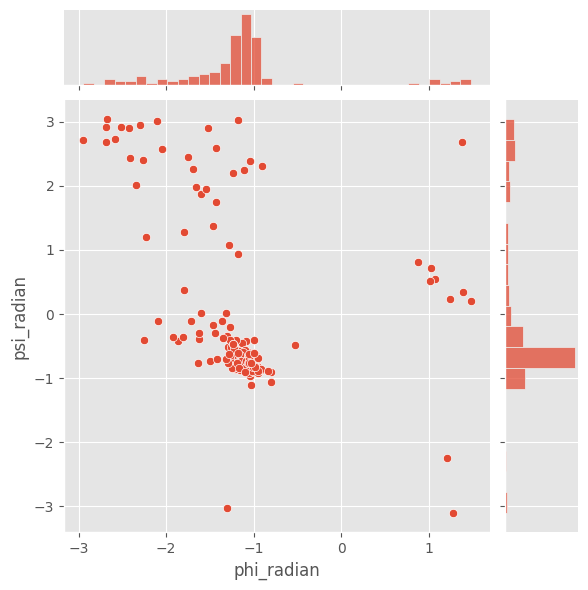

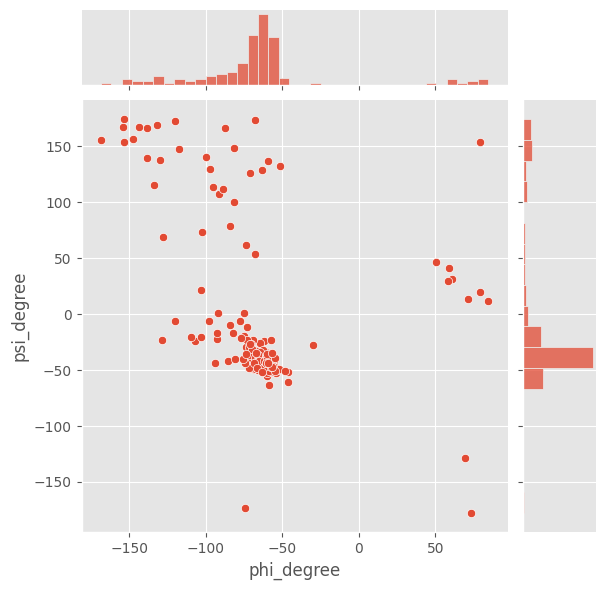

In [25]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

sns.boxplot

sns.jointplot(x='phi_radian', y='psi_radian', data=df)
sns.jointplot(x='phi_degree', y='psi_degree', data=df)
